# 파이썬 데이터분석 프로젝트

### 프리미어리그 데이터 분석을 통한 토트넘의 성적 알아보기

<b>[토트넘은 왜 우승을 하지 못하는가?]</b>

<div style = "text-align: right"> <b>산업데이터사이언스학부 201902405 장원익</b><div>
    
_______________________________________________________________

### 사용한 데이터

English Premier League (EPL) Results (https://www.kaggle.com/datasets/irkaal/english-premier-league-results)

잉글랜드 프리미어리그의 경기 결과 데이터.

데이터 딕셔너리는 다음과 같습니다.

| 컬럼 이름 | 데이터 의미 |
|:-----:|:-----|
|Season |Match Season|
|DateTime |Match Date and Time (yyyy-mm-dd hhmmss)|
|HomeTeam |Home Team|
|AwayTeam |Away Team|
|FTHG |Full Time Home Team Goals|
|FTAG |Full Time Away Team Goals|
|FTR |Full Time Result (H=Home Win, D=Draw, A=Away Win)|
|HTHG |Half Time Home Team Goals|
|HTAG |Half Time Away Team Goals|
|HTR |Half Time Result (H=Home Win, D=Draw, A=Away Win)|
|Referee |Match Referee|
|HS |Home Team Shots|
|AS |Away Team Shots|
|HST |Home Team Shots on Target|
|AST |Away Team Shots on Target|
|HC |Home Team Corners|
|AC |Away Team Corners|
|HF |Home Team Fouls Committed|
|AF |Away Team Fouls Committed|
|HY |Home Team Yellow Cards|
|AY |Away Team Yellow Cards|
|HR |Home Team Red Cards|
|AR |Away Team Red Cards|

_______________

시작하기에 앞서 사용할 모듈들을 import합니다.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

사용할 데이터를 불러옵니다

In [162]:
leage = pd.read_csv('archive/results.csv', encoding = 'cp949')

데이터를 확인합니다.

In [163]:
leage.sample(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
3898,2002-03,2003-04-05T00:00:00Z,Middlesbrough,West Brom,3,0,H,1.0,0.0,H,...,12.0,6.0,3.0,5.0,9.0,15.0,0.0,1.0,0.0,0.0
2363,1998-99,1999-04-03T00:00:00Z,Derby,Newcastle,3,4,A,2.0,3.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6827,2010-11,2011-01-05T00:00:00Z,Arsenal,Man City,0,0,D,0.0,0.0,D,...,8.0,0.0,7.0,2.0,6.0,12.0,0.0,2.0,1.0,1.0
4286,2003-04,2004-04-12T00:00:00Z,Portsmouth,Birmingham,3,1,H,1.0,0.0,H,...,6.0,2.0,4.0,4.0,19.0,11.0,1.0,2.0,0.0,1.0
5710,2007-08,2008-01-20T00:00:00Z,Man City,West Ham,1,1,D,1.0,1.0,D,...,6.0,5.0,5.0,10.0,15.0,20.0,2.0,4.0,0.0,0.0
6279,2009-10,2009-08-30T00:00:00Z,Portsmouth,Man City,0,1,A,0.0,1.0,A,...,6.0,8.0,3.0,11.0,12.0,7.0,2.0,1.0,0.0,0.0
11055,2021-22,2022-02-26T15:00:00Z,Crystal Palace,Burnley,1,1,D,1.0,0.0,H,...,4.0,1.0,5.0,4.0,5.0,17.0,0.0,2.0,0.0,0.0
1718,1997-98,1997-08-27T00:00:00Z,Tottenham,Aston Villa,3,2,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,1994-95,1994-10-09T00:00:00Z,Newcastle,Blackburn,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,1993-94,1993-09-11T00:00:00Z,Aston Villa,Coventry,0,0,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
leage.dtypes

Season       object
DateTime     object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

In [165]:
#DateTime을 시간 데이터로 변환
leage.DateTime = pd.to_datetime(leage.DateTime)
leage.dtypes

Season                   object
DateTime    datetime64[ns, UTC]
HomeTeam                 object
AwayTeam                 object
FTHG                      int64
FTAG                      int64
FTR                      object
HTHG                    float64
HTAG                    float64
HTR                      object
Referee                  object
HS                      float64
AS                      float64
HST                     float64
AST                     float64
HC                      float64
AC                      float64
HF                      float64
AF                      float64
HY                      float64
AY                      float64
HR                      float64
AR                      float64
dtype: object

데이터가 아주 크지 않고 메모리 용량이 넉넉하므로 데이터의 크기를 줄이는 작업 등은 생략하도록 합니다.

__________

너무 옛날의 데이터이면서 데이터의 상당 부분이 NA값인 2000년도 이전의 값을 지워 주도록 합시다.

In [166]:
leage = leage.sort_values(by = ['Season', 'DateTime'])

leage.Season.value_counts() #Season의 형태를 알아봅니다.
leage_00 = leage[leage.Season >= '2000-01'] #2000-01시즌 이후의 데이터만 남깁니다.
leage_00.Season.value_counts() #원하는 대로 잘 삭제되었는지 확인

Season
2000-01    380
2001-02    380
2020-21    380
2019-20    380
2018-19    380
2017-18    380
2016-17    380
2015-16    380
2014-15    380
2013-14    380
2012-13    380
2011-12    380
2010-11    380
2009-10    380
2008-09    380
2007-08    380
2006-07    380
2005-06    380
2004-05    380
2003-04    380
2002-03    380
2021-22    309
Name: count, dtype: int64

2021 - 22 시즌의 데이터는 완성되지 않았습니다. 해당 데이터도 사용하지 않겠습니다.

In [167]:
leage_00 = leage_00[leage_00.Season != '2021-22']
leage_00.Season.value_counts()

Season
2000-01    380
2011-12    380
2019-20    380
2018-19    380
2017-18    380
2016-17    380
2015-16    380
2014-15    380
2013-14    380
2012-13    380
2010-11    380
2001-02    380
2009-10    380
2008-09    380
2007-08    380
2006-07    380
2005-06    380
2004-05    380
2003-04    380
2002-03    380
2020-21    380
Name: count, dtype: int64

2000년부터 2021년까지 프리미어리그에서 뛰었던 팀을 알아봅시다.

In [168]:
leage_00.HomeTeam.value_counts()

HomeTeam
Chelsea             399
Liverpool           399
Tottenham           399
Man United          399
Arsenal             399
Everton             399
Man City            380
Newcastle           361
Aston Villa         342
West Ham            342
Fulham              285
Sunderland          266
Southampton         266
West Brom           247
Bolton              209
Blackburn           209
Middlesbrough       190
Leicester           190
Stoke               190
Crystal Palace      171
Wigan               152
Portsmouth          133
Burnley             133
Swansea             133
Wolves              133
Charlton            133
Birmingham          133
Watford             114
Norwich             114
Bournemouth          95
Hull                 95
Leeds                95
Brighton             76
Sheffield United     57
Reading              57
Derby                57
QPR                  57
Cardiff              38
Ipswich              38
Huddersfield         38
Bradford             19
Blackpo

___________
# 데이터 분리

먼저 해당 기간 동안 토트넘의 데이터를 분리해 보겠습니다.

경기 데이터와 축구 특성 상, 홈 경기와 원정 경기를 분리해서 추출하도록 합니다.

In [169]:
leage_tot_home = leage_00[leage_00.HomeTeam == 'Tottenham']
leage_tot_away = leage_00[leage_00.AwayTeam == 'Tottenham']

In [191]:
#데이터가 잘 분리되었는지 확인
leage_tot_home.sample(3)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
4981,2005-06,2006-02-19 00:00:00+00:00,Tottenham,Wigan,2,2,D,1.0,1.0,D,...,4.0,5.0,4.0,3.0,12.0,14.0,1.0,1.0,0.0,0.0
4177,2003-04,2004-01-17 00:00:00+00:00,Tottenham,Liverpool,2,1,H,1.0,0.0,H,...,3.0,4.0,5.0,6.0,18.0,9.0,1.0,1.0,0.0,0.0
10010,2018-19,2019-04-23 00:00:00+00:00,Tottenham,Brighton,1,0,H,0.0,0.0,D,...,5.0,1.0,6.0,3.0,7.0,13.0,1.0,2.0,0.0,0.0


각 시즌의 우승팀 데이터를 추출해 봅시다.

2000-01 시즌부터 프리미어리그 우승팀은

맨체스터 유나이티드 -> 아스날 -> 맨체스터 유나이티드 -> 아스날 -> 첼시 -> 첼시 -> 맨체스터 유나이티드 -> 맨체스터 유나이티드 -> 맨체스터 유나이티드 -> 첼시 -> 맨체스터 유나이티드 -> 

맨체스터 시티 -> 맨체스터 유나이티드 -> 맨체스터 시티 -> 첼시 -> 레스터 -> 첼시 -> 맨체스터 시티 -> 맨체스터 시티 -> 리버풀 -> 맨체스터 시티

In [192]:
leage_winner_home = leage_00[(leage_00.Season == '2000-01') & (leage_00.HomeTeam == 'Man United') |
                             (leage_00.Season == '2001-02') & (leage_00.HomeTeam == 'Arsenal') |
                             (leage_00.Season == '2002-03') & (leage_00.HomeTeam == 'Man United') |
                             (leage_00.Season == '2003-04') & (leage_00.HomeTeam == 'Arsena') |
                             (leage_00.Season == '2004-05') & (leage_00.HomeTeam == 'Chelsea') |
                             (leage_00.Season == '2005-06') & (leage_00.HomeTeam == 'Chelsea') |
                             (leage_00.Season == '2006-07') & (leage_00.HomeTeam == 'Man United') |
                             (leage_00.Season == '2007-08') & (leage_00.HomeTeam == 'Man United') |
                             (leage_00.Season == '2008-09') & (leage_00.HomeTeam == 'Man United') |
                             (leage_00.Season == '2009-10') & (leage_00.HomeTeam == 'Chelsea') |
                             (leage_00.Season == '2010-11') & (leage_00.HomeTeam == 'Man United') |
                             (leage_00.Season == '2011-12') & (leage_00.HomeTeam == 'Man City') |
                             (leage_00.Season == '2012-13') & (leage_00.HomeTeam == 'Man United') |
                             (leage_00.Season == '2013-14') & (leage_00.HomeTeam == 'Man City') |
                             (leage_00.Season == '2014-15') & (leage_00.HomeTeam == 'Chelsea') |
                             (leage_00.Season == '2015-16') & (leage_00.HomeTeam == 'Leicester') |
                             (leage_00.Season == '2016-17') & (leage_00.HomeTeam == 'Chelsea') |
                             (leage_00.Season == '2017-18') & (leage_00.HomeTeam == 'Man City') |
                             (leage_00.Season == '2018-19') & (leage_00.HomeTeam == 'Man City') |
                             (leage_00.Season == '2019-20') & (leage_00.HomeTeam == 'Liverpool') |
                             (leage_00.Season == '2020-21') & (leage_00.HomeTeam == 'Man City')
                            ]
leage_winner_away = leage_00[(leage_00.Season == '2000-01') & (leage_00.AwayTeam == 'Man United') |
                             (leage_00.Season == '2001-02') & (leage_00.AwayTeam == 'Arsenal') |
                             (leage_00.Season == '2002-03') & (leage_00.AwayTeam == 'Man United') |
                             (leage_00.Season == '2003-04') & (leage_00.AwayTeam == 'Arsena') |
                             (leage_00.Season == '2004-05') & (leage_00.AwayTeam == 'Chelsea') |
                             (leage_00.Season == '2005-06') & (leage_00.AwayTeam == 'Chelsea') |
                             (leage_00.Season == '2006-07') & (leage_00.AwayTeam == 'Man United') |
                             (leage_00.Season == '2007-08') & (leage_00.AwayTeam == 'Man United') |
                             (leage_00.Season == '2008-09') & (leage_00.AwayTeam == 'Man United') |
                             (leage_00.Season == '2009-10') & (leage_00.AwayTeam == 'Chelsea') |
                             (leage_00.Season == '2010-11') & (leage_00.AwayTeam == 'Man United') |
                             (leage_00.Season == '2011-12') & (leage_00.AwayTeam == 'Man City') |
                             (leage_00.Season == '2012-13') & (leage_00.AwayTeam == 'Man United') |
                             (leage_00.Season == '2013-14') & (leage_00.AwayTeam == 'Man City') |
                             (leage_00.Season == '2014-15') & (leage_00.AwayTeam == 'Chelsea') |
                             (leage_00.Season == '2015-16') & (leage_00.AwayTeam == 'Leicester') |
                             (leage_00.Season == '2016-17') & (leage_00.AwayTeam == 'Chelsea') |
                             (leage_00.Season == '2017-18') & (leage_00.AwayTeam == 'Man City') |
                             (leage_00.Season == '2018-19') & (leage_00.AwayTeam == 'Man City') |
                             (leage_00.Season == '2019-20') & (leage_00.AwayTeam == 'Liverpool') |
                             (leage_00.Season == '2020-21') & (leage_00.AwayTeam == 'Man City')
                            ]

_______

# 기본적인 공격력 분석

축구는 골을 넣는 스포츠입니다.

데이터분석을 하지 않아도 골을 많이 넣으면 승리할 확률이 높고, 승리한 경기가 많으면 순위가 높다는 것은 알 수 있지만 구체적으로 얼마나 차이가 나는지는 궁금하기 때문에 한 번 알아보도록 하겠습니다.

([<matplotlib.axis.XTick at 0x1f9b6be9c40>,
 [Text(0, 0, 'Tot_Home'),
  Text(1, 0, 'Tot_Away'),
  Text(2, 0, 'Winner_Home'),
  Text(3, 0, 'Winner_Away'),
  Text(4, 0, 'Leage_Teams_Home'),
  Text(5, 0, 'Leage_Teams_Away')])

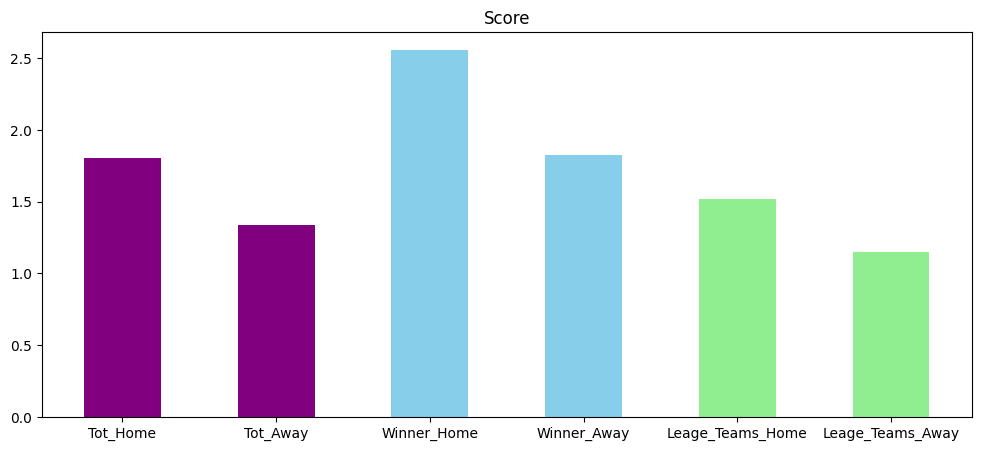

In [193]:
teams_goal = [
    leage_tot_home.FTHG.mean(),
    leage_tot_away.FTAG.mean(),
    leage_winner_home.FTHG.mean(),
    leage_winner_away.FTAG.mean(),
    leage_00.FTHG.mean(),
    leage_00.FTAG.mean()
]

fig, ax = plt.subplots(figsize = (12,5))
ax.bar(range(6), teams_goal, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.5)
ax.set(title = 'Score')
plt.xticks(range(6), ['Tot_Home', 'Tot_Away', 'Winner_Home', 'Winner_Away', 'Leage_Teams_Home', 'Leage_Teams_Away'])

토트넘의 홈, 원정 득점 추이를 보면 우승팀보다는 프리미어리그 평균에 더 가까운 데이터를 보여주고 있습니다.

토트넘의 공격력이 우승권에 도전할 만큼 압도적이지 않다는 것을 알 수 있겠습니다.

그렇다면 그 원인을 분석해 보도록 하겠습니다.

먼저, 슈팅 대비 유효슈팅 - 득점 전환 비율을 알아보도록 하겠습니다.

In [194]:
teams_SPG = [
    (leage_tot_home.FTHG / leage_tot_home.HS).mean() * 100,
    (leage_tot_away.FTAG / leage_tot_away.AS).mean() * 100,
    (leage_winner_home.FTHG / leage_winner_home.HS).mean() * 100,
    (leage_winner_away.FTAG / leage_winner_away.AS).mean() * 100,
    (leage_00.FTHG / leage_00.HS).replace(np.inf, 0).mean() * 100,
    (leage_00.FTAG / leage_00.AS).replace(np.inf, 0).mean() * 100
]

([<matplotlib.axis.XTick at 0x1f9b6afe670>,
 [Text(0, 0, 'Tot_Home'),
  Text(1, 0, 'Tot_Away'),
  Text(2, 0, 'Winner_Home'),
  Text(3, 0, 'Winner_Away'),
  Text(4, 0, 'Leage_Teams_Home'),
  Text(5, 0, 'Leage_Teams_Away')])

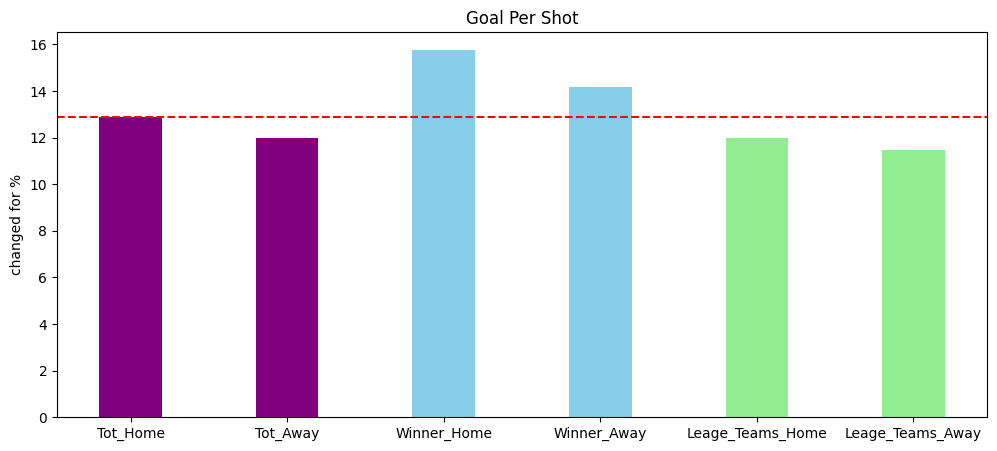

In [195]:
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(range(6), teams_SPG, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax.set(title = 'Goal Per Shot',
       ylabel = 'changed for %')
ax.axhline(y = teams_SPG[0], color='red', linestyle='--')
plt.xticks(range(6), ['Tot_Home', 'Tot_Away', 'Winner_Home', 'Winner_Away', 'Leage_Teams_Home', 'Leage_Teams_Away'])

([<matplotlib.axis.XTick at 0x1f9b725f490>,
 [Text(0, 0, 'Tot_Home'),
  Text(1, 0, 'Tot_Away'),
  Text(2, 0, 'Winner_Home'),
  Text(3, 0, 'Winner_Away'),
  Text(4, 0, 'Leage_Teams_Home'),
  Text(5, 0, 'Leage_Teams_Away')])

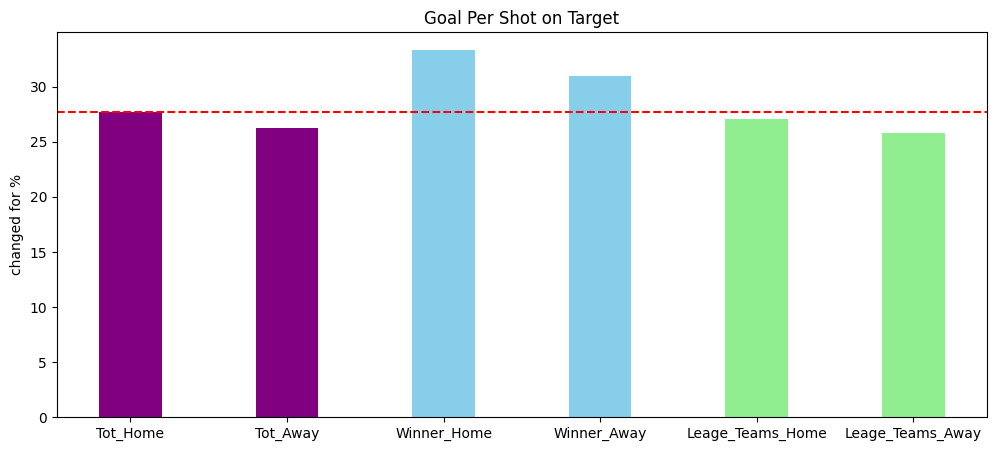

In [196]:
teams_SPSoT = [
    (leage_tot_home.FTHG / leage_tot_home.HST).mean() * 100,
    (leage_tot_away.FTAG / leage_tot_away.AST).mean() * 100,
    (leage_winner_home.FTHG / leage_winner_home.HST).mean() * 100,
    (leage_winner_away.FTAG / leage_winner_away.AST).mean() * 100,
    (leage_00.FTHG / leage_00.HST).replace(np.inf, 0).mean() * 100,
    (leage_00.FTAG / leage_00.AST).replace(np.inf, 0).mean() * 100
]
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(range(6), teams_SPSoT, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax.set(title = 'Goal Per Shot on Target',
       ylabel = 'changed for %')
ax.axhline(y = teams_SPSoT[0], color='red', linestyle='--')
plt.xticks(range(6), ['Tot_Home', 'Tot_Away', 'Winner_Home', 'Winner_Away', 'Leage_Teams_Home', 'Leage_Teams_Away'])

여러 팀의 '골 / 슈팅' 비율과 '골 / 유효슈팅' 비율을 살펴봤습니다.

토트넘은 우승팀의 데이터에 비해 '슛 대비 득점 비율'은 약 2% 모자랐고, '유효슈팅 대비 득점 비율'은 약 4% 모자랐습니다.

확실히 차이가 나기는 하지만 경기당 평균 득점이 0.7골정도 차이나는 것을 설명하기에는 부족함이 있습니다.

유효슈팅과 슈팅의 갯수 자체에 차이가 나는 것인지 알아보겠습니다.

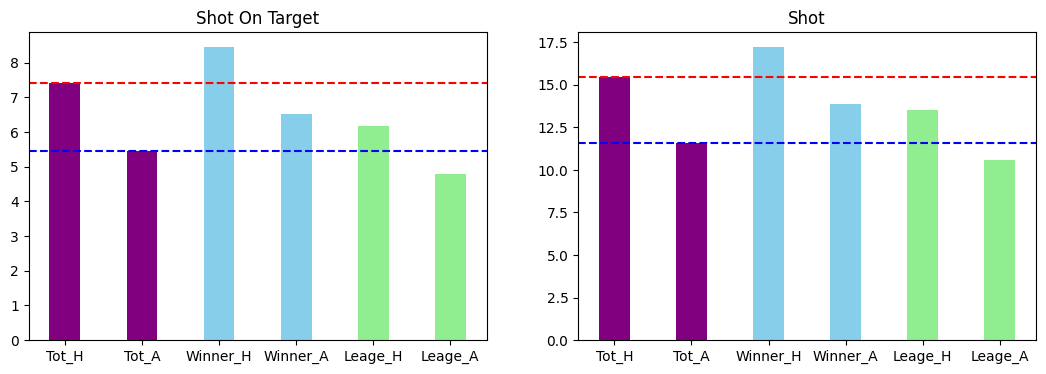

In [197]:
teams_SOT = [
    leage_tot_home.HST.mean(),
    leage_tot_away.AST.mean(),
    leage_winner_home.HST.mean(),
    leage_winner_away.AST.mean(),
    leage_00.HST.mean(),
    leage_00.AST.mean()
]
teams_ST = [
    leage_tot_home.HS.mean(),
    leage_tot_away.AS.mean(),
    leage_winner_home.HS.mean(),
    leage_winner_away.AS.mean(),
    leage_00.HS.mean(),
    leage_00.AS.mean()
]

#ax1 그래프
xlabels = ['Tot_H', 'Tot_A', 'Winner_H', 'Winner_A', 'Leage_H', 'Leage_A']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 4))
ax1.bar(range(6), teams_SOT, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax1.set(title = 'Shot On Target',)
ax1.axhline(y = teams_SOT[0], color='red', linestyle='--')
ax1.axhline(y = teams_SOT[1], color='blue', linestyle='--')
ax1.set_xticks(range(6), xlabels)

#ax2 그래프
xlabels = ['Tot_H', 'Tot_A', 'Winner_H', 'Winner_A', 'Leage_H', 'Leage_A']
ax2.bar(range(6), teams_ST, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax2.set(title = 'Shot')
ax2.axhline(y = teams_ST[0], color='red', linestyle='--')
ax2.axhline(y = teams_ST[1], color='blue', linestyle='--')
ax2.set_xticks(range(6), xlabels)

유효슈팅 수는 약 1회가 모자라는 것으로 나타났고, 슈팅의 개수는 약 2회가 모자라는 것으로 나타났습니다.

현재까지 공격력을 분석한 바를 정리해 보겠습니다.

|/| 토트넘 홈 | 토트넘 원정 | 우승팀 홈 | 우승팀 원정 | 모든 팀 홈 | 모든 팀 원정 |
|:---|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
|득점|1.8|1.3|2.5|1.8|1.5|1.1|
|슈팅|15.4|11.5|17.2|13.8|13.4|10.6|
|유효슈팅|7.4|5.4|8.4|6.5|6.1|4.7|
|슛 대비 골(%)|12.8|11.9|15.7|14.1|11.9|11.4|
|유효슈팅 대비 골(%)|27.7|26.2|33.2|30.9|27.0|25.7|

현재까지 알아본 공격력에서의 부족한 부분 중 가장 드러나는 부분은 유효슈팅 대비 골 부분입니다.

슈팅의 수, 유효슈팅의 수는 우승팀에 비해서는 떨어지나 프리미어리그 평균보다는 높은 수준을 보여 주나

유효슈팅을 골로 결정짓는 부분에 있어서 프리미어리그 평균과 큰 차이를 보이지 못하고 있었습니다.

토트넘에는 속도가 아주 빨라 역습에 최적화되있거나 개인기가 뛰어난 선수들이 많이 있습니다.

이런 선수들은 상대 팀의 반칙을 자주 유도합니다. 특히 핵심적인 득점 기회를 상대가 반칙으로 저지했을 때에는 카드를 받게 됩니다.

토트넘을 상대하는 팀들은 얼마나 자주 반칙을 저지르는지 알아보도록 하겠습니다.

([<matplotlib.axis.XTick at 0x1f9b72cc880>,
 [Text(0, 0, 'Tot_H'),
  Text(1, 0, 'Tot_A'),
  Text(2, 0, 'Winner_H'),
  Text(3, 0, 'Winner_A'),
  Text(4, 0, 'Leage_H'),
  Text(5, 0, 'Leage_A')])

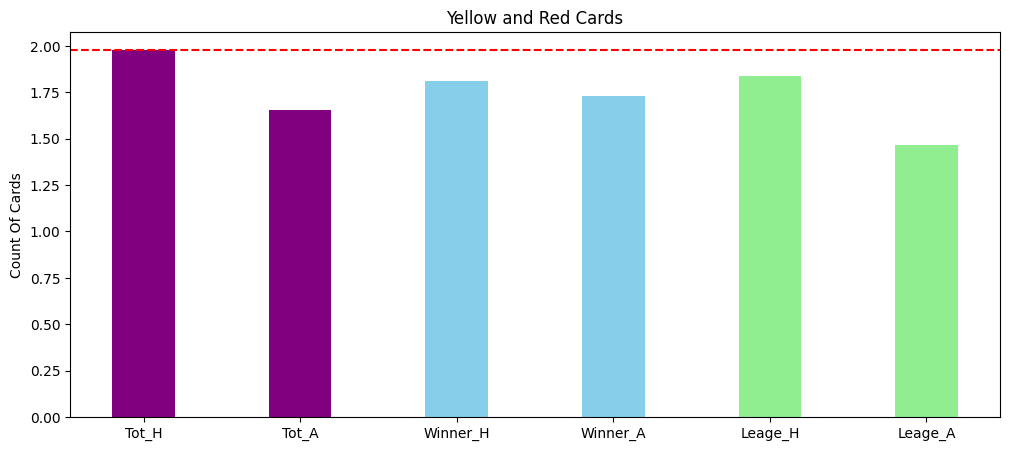

In [198]:
teams_Card = [
    (leage_tot_home.AY + leage_tot_home.AR).mean(),
    (leage_tot_away.HY + leage_tot_away.HR).mean(),
    (leage_winner_home.AY + leage_winner_home.AR).mean(),
    (leage_winner_away.HY + leage_winner_away.HR).mean(),
    (leage_00.AY + leage_00.AR).mean(),
    (leage_00.HY + leage_00.HR).mean()
]

fig, ax = plt.subplots(figsize = (12,5))
ax.bar(range(6), teams_Card, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax.set(title = 'Yellow and Red Cards',
       ylabel = 'Count Of Cards')
ax.axhline(y = teams_Card[0], color='red', linestyle='--')
plt.xticks(range(6), xlabels)

토트넘의 피반칙(카드) 횟수는 프리미어리그 평균과 우승팀 평균보다 비슷하거나 상회하는 결과를 보여주었습니다.

(가벼운 분석) 이는 토트넘이 상대에게 카드를 강요하기 쉬운 플레이, 즉 역습 위주의 플레이 혹은 개인기를 위시한 플레이를 강점으로 내세운 경기를 자주 한다는 것으로 이해할 수 있겠습니다.

다른 해석으로는 핵심적인 찬스 등에서 상대방의 반칙에 기회를 날리는 경우가 많다는 것을 나타내기도 하겠습니다. 반칙을 피하고 득점으로 연결하는 것 또한 강팀의 조건이니만큼 긍정적인 데이터라고만 해석하기는 어려운 부분이겠습니다.

_____

이번에는 토트넘의 경기력이 저조했던 경기의 수를 알아보겠습니다.

강팀을 만나거나 상대적 약팀의 수비 집중 전술을 뚫어내지 못하고 슈팅 자체를 만들어내지 못한 경기의 비율을 분석해 보도록 하겠습니다.

([<matplotlib.axis.XTick at 0x1f9a93ba340>,
 [Text(0, 0, 'Tot_H'),
  Text(1, 0, 'Tot_A'),
  Text(2, 0, 'Winner_H'),
  Text(3, 0, 'Winner_A'),
  Text(4, 0, 'Leage_H'),
  Text(5, 0, 'Leage_A')])

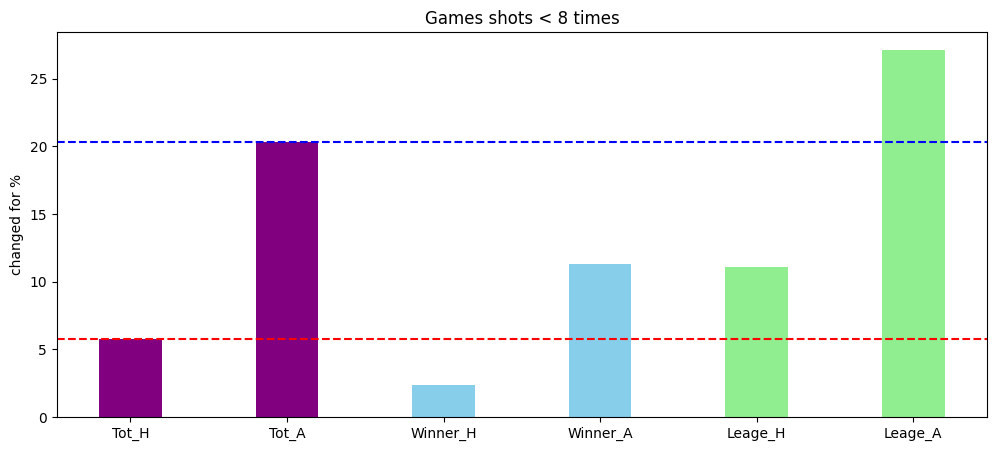

In [199]:
teams_Losegame = [
    len(leage_tot_home[leage_tot_home.HS < 8]) / len(leage_tot_home) * 100,
    len(leage_tot_away[leage_tot_away.AS < 8]) / len(leage_tot_away) * 100,
    len(leage_winner_home[leage_winner_home.HS < 8]) / len(leage_winner_home) * 100,
    len(leage_winner_away[leage_winner_away.AS < 8]) / len(leage_winner_away) * 100,
    len(leage_00[leage_00.HS < 8]) / len(leage_00) * 100,
    len(leage_00[leage_00.AS < 8]) / len(leage_00) * 100
]

fig, ax = plt.subplots(figsize = (12,5))
ax.bar(range(6), teams_Losegame, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax.set(title = 'Games shots < 8 times',
       ylabel = 'changed for %')
ax.axhline(y = teams_Losegame[0], color='red', linestyle='--')
ax.axhline(y = teams_Losegame[1], color='blue', linestyle='--')
plt.xticks(range(6), xlabels)

이번에는 의미 있는 차이를 가진 데이터를 분석해 내었습니다.

전체 경기 수 대비 '슈팅 수가 8번보다 적었던 경기'의 비율이 우승팀의 그것에 비하여 2배 가까이 높은 것을 알 수 있습니다.

약 10%의 경기 수가 차이나므로 단순 계산을 해 보면 시즌당 38 * 1/10 = 약 4경기, 즉 모두 비겼을 경우 8점, 모두 졌을 경우 12점의 승점을 상대적으로 얻지 못한 것을 알 수 있습니다. 이는 상당히 의미 있는 차이로 순위를 어느 정도 결정지을 수 있는 차이를 도출했습니다.

즉 토트넘의 가장 큰 약점 중 하나를 찾아내었습니다. 강팀을 상대하거나, 수비적인 전술을 내세우는 팀 상대로 상당히 아쉬운 경기력을 보인다는 것을 알아내었습니다.

___
## 이번에는 토트넘의 수비력을 분석해 보겠습니다.

공격력 분석 때와 마찬가지로 실점, 상대방의 슈팅, 상대방의 유효슈팅을 알아보겠습니다.

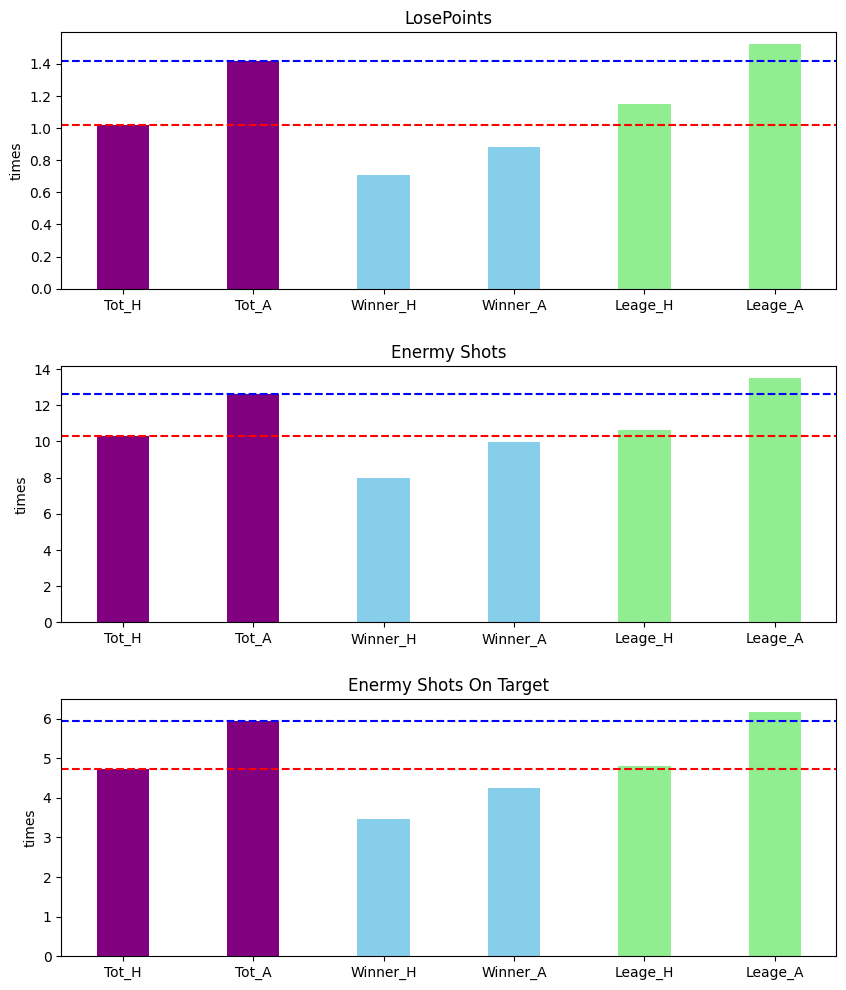

In [200]:
teams_LosePoints = [
    leage_tot_home.FTAG.mean(),
    leage_tot_away.FTHG.mean(),
    leage_winner_home.FTAG.mean(),
    leage_winner_away.FTHG.mean(),
    leage_00.FTAG.mean(),
    leage_00.FTHG.mean()
]

teams_ES = [
    leage_tot_home.AS.mean(),
    leage_tot_away.HS.mean(),
    leage_winner_home.AS.mean(),
    leage_winner_away.HS.mean(),
    leage_00.AS.mean(),
    leage_00.HS.mean()
]

teams_ESoT = [
    leage_tot_home.AST.mean(),
    leage_tot_away.HST.mean(),
    leage_winner_home.AST.mean(),
    leage_winner_away.HST.mean(),
    leage_00.AST.mean(),
    leage_00.HST.mean()
]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10, 12))
fig.subplots_adjust(hspace = 0.3)
#ax1
ax1.bar(range(6), teams_LosePoints, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax1.set(title = 'LosePoints',
       ylabel = 'times')
ax1.axhline(y = teams_LosePoints[0], color='red', linestyle='--')
ax1.axhline(y = teams_LosePoints[1], color='blue', linestyle='--')
ax1.set_xticks(range(6), xlabels)
#ax2
ax2.bar(range(6), teams_ES, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax2.set(title = 'Enermy Shots',
       ylabel = 'times')
ax2.axhline(y = teams_ES[0], color='red', linestyle='--')
ax2.axhline(y = teams_ES[1], color='blue', linestyle='--')
ax2.set_xticks(range(6), xlabels)
#ax3
ax3.bar(range(6), teams_ESoT, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax3.set(title = 'Enermy Shots On Target',
       ylabel = 'times')
ax3.axhline(y = teams_ESoT[0], color='red', linestyle='--')
ax3.axhline(y = teams_ESoT[1], color='blue', linestyle='--')
ax3.set_xticks(range(6), xlabels)

토트넘의 수비력은 우승권에 도전하기에는 상당히 부족한 지표를 보여주었습니다.

실점, 피슈팅, 피유효슈팅 모두 우승권의 성적보다는 프리미어리그 평균의 데이터에 더 가까운 모습을 보여주고 있습니다.

이제는 단순한 수치 외에 조금 더 자세한 데이터를 분석해보도록 하겠습니다.

___

## 토트넘의 위닝 멘탈리티

전반전이 지고 있을 때 비기거나 이긴 경기의 비율을 알아보겠습니다.

무릇 강팀이라면 가지고 있어야 할 위닝 멘탈리티의 척도를 이를 통해 알아볼 수 있을 것입니다.

([<matplotlib.axis.XTick at 0x1f9b2a8f760>,
 [Text(0, 0, 'Tot_H'),
  Text(1, 0, 'Tot_A'),
  Text(2, 0, 'Winner_H'),
  Text(3, 0, 'Winner_A'),
  Text(4, 0, 'Leage_H'),
  Text(5, 0, 'Leage_A')])

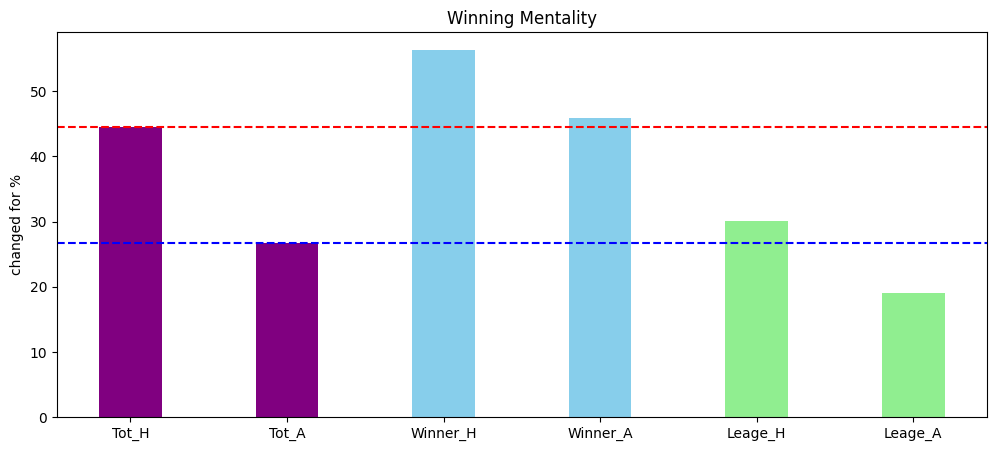

In [201]:
teams_wecando = [
    len(leage_tot_home[(leage_tot_home.HTR == 'A') & (leage_tot_home.FTR != 'A')]) / 
    len(leage_tot_home[leage_tot_home.HTR == 'A']) * 100,
    len(leage_tot_away[(leage_tot_away.HTR == 'H') & (leage_tot_away.FTR != 'H')]) / 
    len(leage_tot_away[leage_tot_away.HTR == 'H']) * 100,
    len(leage_winner_home[(leage_winner_home.HTR == 'A') & (leage_winner_home.FTR != 'A')]) / 
    len(leage_winner_home[leage_winner_home.HTR == 'A']) * 100,
    len(leage_winner_away[(leage_winner_away.HTR == 'H') & (leage_winner_away.FTR != 'H')]) / 
    len(leage_winner_away[leage_winner_away.HTR == 'H']) * 100,
    len(leage_00[(leage_00.HTR == 'A') & (leage_00.FTR != 'A')]) / 
    len(leage_00[leage_00.HTR == 'A']) * 100,
    len(leage_00[(leage_00.HTR == 'H') & (leage_00.FTR != 'H')]) / 
    len(leage_00[leage_00.HTR == 'H']) * 100,
]

fig, ax = plt.subplots(figsize = (12,5))
ax.bar(range(6), teams_wecando, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax.set(title = 'Winning Mentality',
       ylabel = 'changed for %')
ax.axhline(y = teams_wecando[0], color='red', linestyle='--')
ax.axhline(y = teams_wecando[1], color='blue', linestyle='--')
plt.xticks(range(6), xlabels)

전반전 결과가 상대팀 승리일 경우에(분모) 경기 결과가 비기거나 승리(분자)하는 비율입니다.

우승팀들의 데이터와 프리미어리그 평균의 데이터 중간에 위치한 모습입니다. 다른 지표들에 비해 프리미어리그 평균과의 차이가 어느 정도 있지만,

우승권 경쟁을 위해서는 조금 더 분발할 필요가 있어 보입니다.

특히 원정 경기에서 전반전을 끌려가고 있을 때 승점을 획득할 확률을 높일 필요가 커 보입니다.

_____
이번에는 반대로 이기고 있는 경기를 역전당해 승점 3점을 획득하지 못한 경기의 비율을 파악해 보겠습니다.

승리를 지키는 것 또한 중요한 일이기 때문에, 이렇게 날려버린 승점이 많으면 우승은 영원히 꿈으로 남을 수 밖에 없겠습니다.

([<matplotlib.axis.XTick at 0x1f9b29a4850>,
 [Text(0, 0, 'Tot_H'),
  Text(1, 0, 'Tot_A'),
  Text(2, 0, 'Winner_H'),
  Text(3, 0, 'Winner_A'),
  Text(4, 0, 'Leage_H'),
  Text(5, 0, 'Leage_A')])

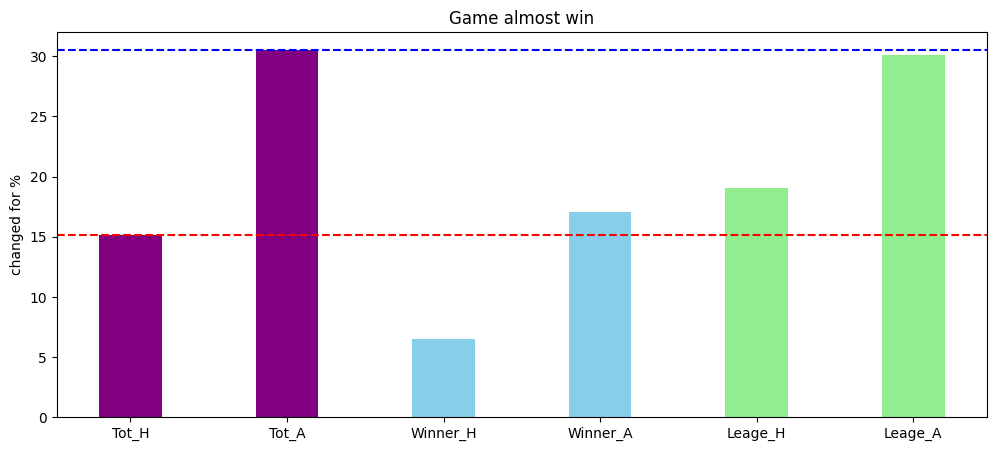

In [202]:
teams_Lostgame = [
    len(leage_tot_home[(leage_tot_home.HTR == 'H') & (leage_tot_home.FTR != 'H')]) / 
    len(leage_tot_home[leage_tot_home.HTR == 'H']) * 100,
    len(leage_tot_away[(leage_tot_away.HTR == 'A') & (leage_tot_away.FTR != 'A')]) / 
    len(leage_tot_away[leage_tot_away.HTR == 'A']) * 100,
    len(leage_winner_home[(leage_winner_home.HTR == 'H') & (leage_winner_home.FTR != 'H')]) / 
    len(leage_winner_home[leage_winner_home.HTR == 'H']) * 100,
    len(leage_winner_away[(leage_winner_away.HTR == 'A') & (leage_winner_away.FTR != 'A')]) / 
    len(leage_winner_away[leage_winner_away.HTR == 'A']) * 100,
    len(leage_00[(leage_00.HTR == 'H') & (leage_00.FTR != 'H')]) / 
    len(leage_00[leage_00.HTR == 'H']) * 100,
    len(leage_00[(leage_00.HTR == 'A') & (leage_00.FTR != 'A')]) / 
    len(leage_00[leage_00.HTR == 'A']) * 100,
]

fig, ax = plt.subplots(figsize = (12,5))
ax.bar(range(6), teams_Lostgame, 
        color = ['purple', 'purple', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen'],
        width = 0.4)
ax.set(title = 'Game almost win',
       ylabel = 'changed for %')
ax.axhline(y = teams_Lostgame[0], color='red', linestyle='--')
ax.axhline(y = teams_Lostgame[1], color='blue', linestyle='--')
plt.xticks(range(6), xlabels)

우승팀의 데이터에 비하여, 승점을 잃어버린 경기의 비율은 홈과 원정 모두 두 배 가까이 높게 나타났습니다.

특히 원정에서의 역전패 비율은 프리미어리그 평균보다 높게 나타나, 토트넘의 원정 경기력이 상당히 약하다는 것을 알 수 있었습니다.

이번 분석에서는 토트넘이 우승권 경쟁이 아니라 중위권 경쟁 팀의 데이터에 가까운 성적을 보여 주고 있다는 것을 알 수 있습니다.

____
토트넘의 강팀 상대 승률 또한 알아보겠습니다.

우승을 하기 위해서는 약팀과의 경기 결과도 중요하지만 무엇보다도 승점으로 경쟁을 할 강팀들과의 경기 결과 역시 중요합니다.

In [203]:
tot_home_vs_big6 = (
    leage_tot_home
    .groupby('AwayTeam')
    .FTR.value_counts(normalize = True)
    .loc[['Arsenal','Man United', 'Liverpool', 'Chelsea', 'Man City'], 'H']
    * 100
)
tot_away_vs_big6 = (
    leage_tot_away
    .groupby('HomeTeam')
    .FTR.value_counts(normalize = True)
    .loc[['Arsenal','Man United', 'Liverpool', 'Chelsea', 'Man City'], 'A']
    * 100
)
print(tot_home_vs_big6,'\n\n', tot_away_vs_big6)

AwayTeam    FTR
Arsenal     H      38.095238
Man United  H      19.047619
Liverpool   H      42.857143
Chelsea     H      28.571429
Man City    H      55.000000
Name: proportion, dtype: float64 

 HomeTeam    FTR
Arsenal     A       4.761905
Man United  A      19.047619
Liverpool   A       4.761905
Chelsea     A       4.761905
Man City    A      40.000000
Name: proportion, dtype: float64


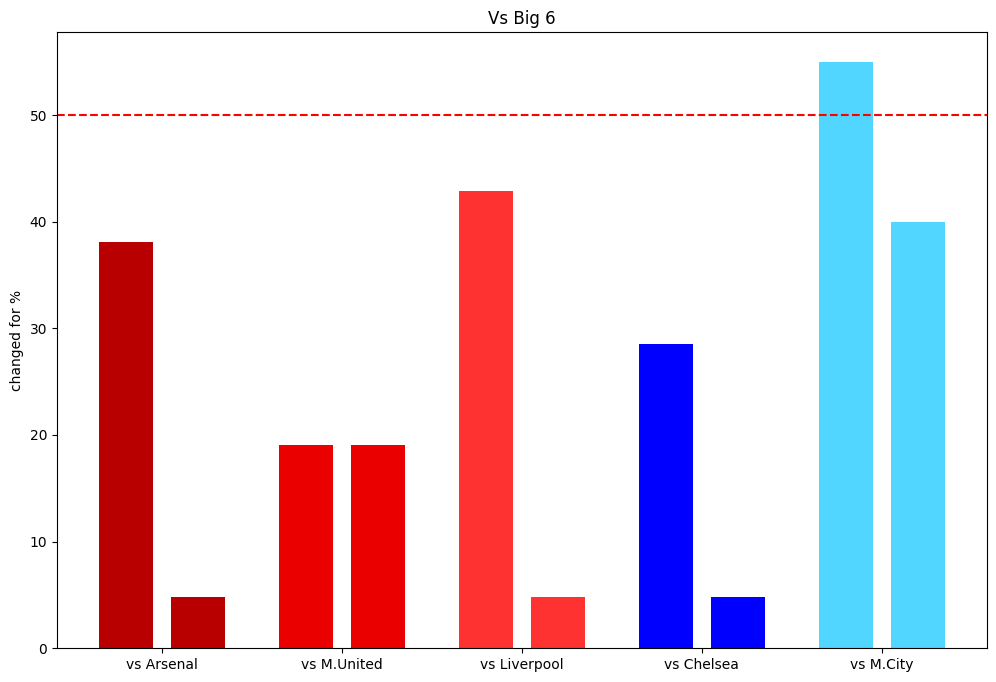

In [204]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.bar(np.arange(5) - 0.2,
       tot_home_vs_big6, 
       color = ['#B90000', '#EB0000', '#FF3232', '#0000FF', '#50D6FF'],
       width = 0.3)
ax.bar(np.arange(5) + 0.2,
       tot_away_vs_big6, 
       color = ['#B90000', '#EB0000', '#FF3232', '#0000FF', '#50D6FF'],
       width = 0.3,)
ax.set(title = 'Vs Big 6',
       ylabel = 'changed for %')
ax.set_xticks(range(5))
ax.set_xticklabels(['vs Arsenal','vs M.United', 'vs Liverpool', 'vs Chelsea', 'vs M.City'])
ax.axhline(y = 50, color='red', linestyle='--')

홈 경기의 경우도 맨시티를 제외하면 50% 이하의 승률을 보였으며,

원정 경기의 경우도 40%의 맨시티를 제외하면 모두 20% 이하의 저조한 승률을 보여주고 있습니다.

토트넘의 Big6(6개의 강팀)를 상대로 한 경기 결과는 상당히 저조한 것을 알 수 있었습니다.

이는 토트넘이 우승에 도전하지 못하는 큰 원인 중 하나라고 유추해 볼 수 있습니다.

In [205]:
ManCity_win_season = (
    leage_00[(leage_00.Season == '2017-18') & (leage_00.HomeTeam == 'Man City')]
    .groupby('AwayTeam')
    .FTR.value_counts()
    .loc[['Arsenal','Man United', 'Liverpool', 'Chelsea', 'Tottenham']],
    leage_00[(leage_00.Season == '2017-18') & (leage_00.AwayTeam == 'Man City')]
    .groupby('HomeTeam')
    .FTR.value_counts()
    .loc[['Arsenal','Man United', 'Liverpool', 'Chelsea', 'Tottenham']]
)
ManCity_win_season

(AwayTeam    FTR
 Arsenal     H      1
 Man United  A      1
 Liverpool   H      1
 Chelsea     H      1
 Tottenham   H      1
 Name: count, dtype: int64,
 HomeTeam    FTR
 Arsenal     A      1
 Man United  A      1
 Liverpool   H      1
 Chelsea     A      1
 Tottenham   A      1
 Name: count, dtype: int64)

조금은 극단적인 비교를 하기 위해 가져온 2017-18시즌의 우승팀 맨시티의 데이터입니다.

Big6 팀을 상대로 홈과 원정 모두 80%의 승률을 기록하며 우승을 했던 시즌입니다.

이 시즌에서 맨시티는 역사상 최대 승점 기록인 100점을 기록하며 우승을 했습니다.

극단적인 비교이지만, 우승에 도전하기 위해서 강팀들과의 대전의 결과가 얼마나 중요한지를 알 수 있습니다.

토트넘의 경우 강팀과의 대결에서 더 좋은 성적을 거두면 좋겠습니다.

____

# 데이터로부터의 의미 도출

토트넘의 공격력은 프리미어리그 우승팀과 프리미어리그 평균값의 중간에 위치하고 있습니다.

슈팅, 유효슈팅을 득점으로 연결하는 비율, 즉 공격진의 결정력은 프리미어리그 평균값에 근사했습니다. 우승을 노리기 위해서는 결정력이 더 좋은 공격진의 영입 또는 기존 선수들의 성장을 필요로 한다는 결론을 도출할 수 있습니다.

만들어 내는 기회의 수 자체는 우승팀에 비해 약간 모자란 것으로 나타났습니다.

약 1~2회의 유효슈팅이, 약 2.5회의 슈팅이 우승팀에 비해 모자랐습니다.

이는 결정력뿐만 아니라 기회 창출 자체도 우승팀에 비해 약점이라는 것을 나타냅니다.

이는 기회 창출에 적극적인 또는 개인 능력이 출중한 미드필더의 영입 등을 필요로 한다는 것을 말합니다.



또한 토트넘은 우승팀보다, 프리미어리그 평균보다 더 많은 카드를 동반한 반칙을 당하고 있습니다.

이는 토트넘에 역습에 용이한 빠른 선수 또는 개인기가 뛰어난 선수가 있다는 것을 나타지만,

상대의 반칙을 통해 평균보다 많은 기회를 잃고 있다는 것을 나타내기도 합니다.

이는 해석의 여지가 있는 데이터 분석 결과라고 하겠습니다.



토트넘은 우승팀에 비해 두 배 많은 경기에서 고전하였습니다. 프리미어리그 평균보다는 적지만 우승팀에 비해서는 많은 비율이었습니다.

특히 원정 경기의 1/5을 8번의 슈팅조차 하지 못하고 고전하였습니다. 이는 우승 경쟁에 치명적인 약점이 될 수 있는 수치입니다.

이것은 토트넘이 토트넘을 압도하는 강팀, 또는 수비적인 전술을 사용하는 팀을 상대로 고전하고 있는 것을 말합니다.

이는 토트넘의 고질적인 문제로, 경기의 주도권을 잡을 수 있는 전술 또는 그런 선수들 또는 수비적 전술을 뚫어낼 수 있는 좋은 개인기의 선수 또는
중거리 능력이 좋은 미드필더 등이 필요하다고 해석할 수 있습니다.



토트넘의 수비력은 상당히 아쉬운 결과를 나타내고 있습니다.

실점 수치는 우승팀의 그것보다는 프리미어리그 평균 수치에 근사하게 나타나고 있습니다.

우승팀보다는 평균적으로 약 0.2골 많이 실점하고 있는 것으로 나타났습니다.

이의 원인으로는 상대에게 허용하는 슈팅과 유효슈팅의 비율을 들 수 있겠습니다.

우승팀보다 상대에게 약 2번의 슈팅과 유효슈팅을 더 허용했으며, 이 수치는 프리미어리그 평균치와 비슷했습니다.



토트넘의 후반 경기력 및 역전 능력에 대해 알아본 결과는 다음과 같습니다.

토트넘은 전반에 상대의 리드를 허용한 경우, 홈에서는 약 45%, 원정에서는 약 27%의 확률로 승점을 획득했습니다.

이에 비해 우승팀들은 같은 상황에서 홈에서 약 57%, 원정에서 약 47%의 확률로 승점을 획득했습니다.

단순 계산을 통해 비교해 봐도 토트넘은 우승팀에 비해 15%p의 경기에서 승점을 획득하지 못하고 있습니다. 

정확하지 않은 계산이지만 프리미어리그는 총 38경기이기 때문에, 15%인 5경기에서 승점을 획득하지 못한다면 단순 계산으로 10~15점의 승점을 뒤쳐지게 됩니다.

이는 토트넘의 치명적인 약점이라고 할 수 있겠습니다.



반대로 전반전을 리드하고 있는 경기에서 역전당하여 패배한 경기의 비율도 알아보았습니다.

이 분석에서 토트넘은 홈 경기에서도 우승팀의 두 배 많은 경기에서 역전패를 당했고(약 15%의 경기)

원정 경기에서는 프리미어리그 평균보다 많은 역전패를 당한 것으로 나타났습니다.



토트넘이 강팀을 상대한 경기에서의 성적 또한 알아보았습니다.

Big6 팀들을 상대로 한 경기를 분석한 결과, 맨시티를 제외한 모든 팀에게 홈에서는 50% 미만의 승률을 보였고

원정 경기에서 역시 맨시티를 제외한 모든 팀에게 20% 미만, 심하게는 4%대의 승률을 보였습니다.

강팀과의 경기는 직접적인 승점 경쟁을 하는 팀과의 경기이기에 더 중요한 의미가 있는데, 강팀과의 경기 결과가
이처럼 저조하다면 토트넘은 우승권에 도전하기가 더 어려울 것이라고 할 수 있겠습니다.

맨시티가 우승했던 시즌과의 간단한 비교를 통해 이의 중요성을 다시 알아보기도 했습니다.

___________

## 최종적으로 정리하자면,

토트넘의 많은 데이터는 프리미어리그 우승팀보다는 프리미어리그 평균치에 가깞거나, 두 데이터 사이에 위치하고 있었습니다.

토트넘의 성적 역시 우승권보다는 우승권 바로 밑에서 중위권 사이를 유지해 온 것을 보면 그 이유를 데이터를 통해 잘 찾아내었다고 할 수 있겠습니다.

특히 의미 있었던 경기 지배력(역전의 경기와, 역전당하지 않는 경기력)의 데이터를 더 좋게 바꿀 필요가 있어 보입니다.

데이터 분석을 통해 토트넘의 대략적인 성적과 세부 팀 성적들의 데이터를 알아볼 수 있었습니다.

## 하지만 아쉬운 부분도 많았습니다.

많은 기간의 데이터를 사용하고자 이 데이터셋을 선택했습니다만, 경기 내부적인 데이터들이 많았다면 더 의미 있는 결과를 도출해 낼 수 있지 않았을까
하는 아쉬움이 남습니다.

예를 들면 패스 횟수, 오프사이드 횟수, 기회 창출, 선수별 경기 데이터, 뛴 거리 등 상관관계와 의미를 더 도출할 수 있는 컬럼들이 있었다면
더 재미있는 데이터 분석이 되지 않았을까 하는 마음 또한 남습니다.

이런 데이터셋이 없지는 않았지만, 데이터 확보 기간이 너무 짧거나, 유해 사이트의 데이터거나, 가져오기 난해한 형식의 파일인 등의 이유로 사용할 수 없는 데이터여서 더 아쉬움이 남습니다.



______


지금까지

## 산업데이터사이언스학부 201902405 장원익

파이썬데이터분석 기말과제였습니다.

감사합니다.

___
## P.S. 추가 분석

토트넘의 승점 추이를 분석합니다. 전반기에 비해 후반기에 힘이 빠지는지 등을 보기 위해서입니다.

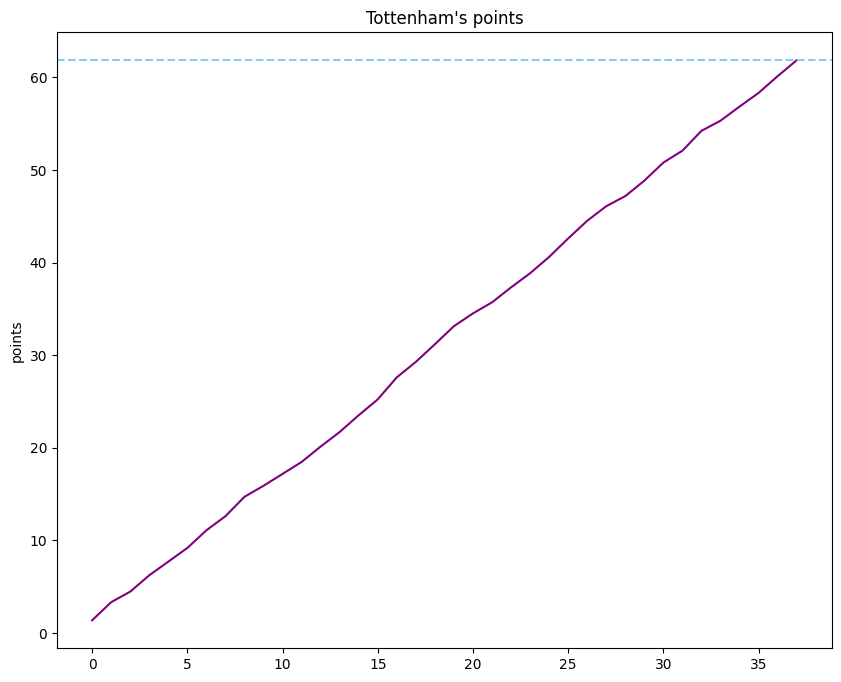

In [340]:
leage_tot = pd.concat([leage_tot_home, leage_tot_away], axis = 0)
leage_tot = leage_tot.sort_values(by = 'DateTime')

def setpoint(row):
    if row.HomeTeam == 'Tottenham':
        if row.FTR == 'H':
            return 3
        elif row.FTR == 'D':
            return 1
        else:
            return 0
    elif row.AwayTeam == 'Tottenham':
        if row.FTR == 'A':
            return 3
        elif row.FTR == 'D':
            return 1
        else:
            return 0

leage_tot['point'] = leage_tot.apply(setpoint, axis = 1)
leage_tot['total_points'] = leage_tot.groupby('Season')['point'].cumsum()

data = []
for season in (leage_tot.Season.unique()):
    season_data = leage_tot.loc[leage_tot.Season == season, 'total_points']
    data.append(season_data.tolist())
tot_points = pd.DataFrame(list(zip(*data)), columns = (leage_tot.Season.unique()))

tot_points_mean = tot_points.mean(axis = 1)

fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(range(len(tot_points_mean)),
        tot_points_mean,
        color = 'purple')
ax.set(title = "Tottenham's points",
       ylabel = 'points')
ax.axhline(y = tot_points_mean[37], color='skyblue', linestyle='--')

여러 시즌의 평균적인 추이를 보았을 때, 토트넘은 전반기에 비해 후반기에 특별히 힘이 빠지거나 급격히 저조한 성적을 보이는 등의 변화는 일어나지 않았습니다. 다만 평균적인 최종 성적이 60점보다 살짝 높은 정도로 상당히 낮은 점수를 보였습니다.

여러모로 마지막까지 토트넘에게도 아쉬움이 많이 남은 데이터 분석이었습니다.
